## **Basic Linear Regression**
---------
### **Building a linear regression model from scratch**

#### Import relevant libraries

In [1]:
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#### Generate random data to train model on

In [2]:
# assign number of observations we want
observations = 1000

# creates a one dimensional array of 1000 X 1 with lowest number being -10 and highest being 10
xs = np.random.uniform(low=-10, high=10, size=(observations,1))

# create another duplicate array to stack
zs = np.random.uniform(-10, 10, (observations,1))

# stack one dimensional arrays
inputs = np.column_stack((xs, zs))

In [3]:
# take a look at the first few entries of the array
inputs[:5]

array([[ 3.45717531, -6.27168787],
       [ 3.84794175,  9.76028003],
       [ 6.64725196, -2.49278245],
       [ 4.55210238,  6.40800674],
       [ 6.73302524,  1.99485943]])

In [4]:
# verify the shape is 1000 X 2
inputs.shape

(1000, 2)

#### Create the targets we will aim at.

Create our own linear equation to assess whether the model learns the correct equation for the predictions.

**$targets = f(x,z) = 2x - 3z + 5 + noise$**
 - where $5$ is our bias and
 - where $noise$ is our data's noise (real data always has noise)

In [5]:
# assign our noise variable
noise = np.random.uniform(-1,1,(observations,1))

# manually assign our targets
targets = 2*xs + 3*zs + 5 + noise

In [6]:
targets.shape

(1000, 1)

In [7]:
targets[:5]

array([[-7.50768343],
       [41.90972909],
       [11.72663344],
       [33.79495925],
       [25.17893721]])

In [8]:
# In order to use the 3D plot, the objects should have a certain shape, so we reshape the targets.
# The proper method to use is reshape and takes as arguments the dimensions in which we want to fit the object.
targets = targets.reshape(observations,)
xs = xs.reshape(observations,)
zs = zs.reshape(observations,)


targets[:50]

array([ -7.50768343,  41.90972909,  11.72663344,  33.79495925,
        25.17893721,  10.01756681, -35.61291754, -10.45366681,
        -6.96418838,  33.34921826,  -4.41107318,   2.51066828,
        -5.1325861 , -12.27836937,  15.50952464,  22.1357485 ,
        21.02517414,   4.46558889,  29.07763334,  14.41645914,
       -15.70271596,  31.66365344,  16.50437419, -25.74374363,
        31.6531589 ,  -2.54923601,  -4.05118687,   8.61831632,
        -4.41907025, -18.48794849,  20.80526648, -24.27965736,
        12.33066064,  19.84073391, -31.25235241,   6.67275152,
        25.33750146,  16.63011661, -34.40378008,  23.30440107,
        -1.99483731,  23.94113825,   7.70350486,  16.00168537,
        -3.18712111, -29.18939514,  30.18950742,  41.8893729 ,
        -8.48179898,  18.33471524])

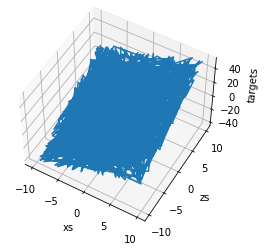

In [9]:
# declare the axes
fig = plt.figure()

# create the 3d plot
ax = fig.add_subplot(111, projection='3d')

# choose/assign the axes
ax.plot(xs, zs, targets)

# set labels
ax.set_xlabel('xs')
ax.set_ylabel('zs')
ax.set_zlabel('targets')

# assess the view of the plot
ax.view_init(elev=50, azim=300)

plt.show()

In [10]:
# reshape variables back to one dimensional arrays
targets = targets.reshape(observations,1)
xs = xs.reshape(observations,1)
zs = zs.reshape(observations,1)

#### Initialize Variables

In [11]:
# radius of range to initialize weights and biases from -0.1 to 0.1
init_range = 0.1

# assign random values to weights, create 2 X 1 matrix since there are two variables, we need two weights
weights = np.random.uniform(-init_range, init_range, size=(2,1))

# bias is scalara so appropriate shape is 1 X 1
# there are as many biases as there are outputs
biases = np.random.uniform(-init_range, init_range, size=1)

print("Weights are\n",weights)
print("-------")
print("Biases are\n",biases)

Weights are
 [[-0.05179223]
 [-0.08905303]]
-------
Biases are
 [0.04128457]


#### Set a learning rate

In [12]:
learning_rate = 0.02

#### Train the Model

In [13]:
for i in range(100):
    
    # calculates outputs for given weights and biases
    outputs = np.dot(inputs, weights) + biases # dot product of inputs X weights
    deltas = outputs - targets
    
    # based off L2-norm loss formula (summation(yi - ti)^2)
    # calculates loss function that compares outputs to the targets
    loss = np.sum(deltas ** 2) / 2 / observations # avg loss/observation aka mean loss
    
    # keep track of loss to see if decreasing, which is good
    print(loss)
    
    deltas_scaled = deltas / observations
    
    weights = weights - learning_rate * np.dot(inputs.T, deltas_scaled)
    biases = biases - learning_rate * np.sum(deltas_scaled)

227.9656502098895
40.52256518456785
15.440037556475268
11.741475891561592
10.875758597227893
10.398539738401858
9.986940615380036
9.597789437471302
9.224840983447937
8.866746818644152
8.522826057160591
8.19250591072263
7.875246971255181
7.57053257833838
7.27786668821097
6.996772895672572
6.7267936360147065
6.4674894372097445
6.218438204143325
5.979234531476055
5.749489043718171
5.528827761403608
5.316891492326494
5.113335246848432
4.917827676324726
4.7300505337354
4.54969815564303
4.376476964634118
4.210104991434084
4.050311415917981
3.8968361262697617
3.7494292955725435
3.607850975140623
3.471870703931231
3.3412671334003172
3.215827667191589
3.0953481150724085
2.9796323605531305
2.868492041648891
2.76174624426416
2.659221207700967
2.5607500418114166
2.4661724553340827
2.3753344949720567
2.288088294787929
2.204291835507773
2.12380871334232
2.046507917949007
1.9722636191734868
1.9009549622234214
1.8324658709411887
1.7666848588552253
1.7035048477024692
1.6428229931264695
1.58454051726745

#### Print weights and biases to see if we have worked correctly
**Recall:**
    The sought dependence was
    **$t = f(xs, zs) = 2xs - 3zs + 5 + noise$**

In [14]:
print("Weights are\n",weights)
print("---------")
print("Bias is\n", biases)

Weights are
 [[1.99576546]
 [3.00062049]]
---------
Bias is
 [4.3546257]


**Takeaway**
- Weights just about match our coefficiant for $x$ and $z$
- Bias is a bit off because we used too few iterations (100)

Re-run code to optimize algorithm for another 100 iterations.

In [15]:
for i in range(100):
    
    # calculates outputs for given weights and biases
    outputs = np.dot(inputs, weights) + biases # dot product of inputs X weights
    deltas = outputs - targets
    
    # based off L2-norm loss formula (summation(yi - ti)^2)
    # calculates loss function that compares outputs to the targets
    loss = np.sum(deltas ** 2) / 2 / observations # avg loss/observation aka mean loss
    
    # keep track of loss to see if decreasing, which is good
    print(loss)
    
    deltas_scaled = deltas / observations
    
    weights = weights - learning_rate * np.dot(inputs.T, deltas_scaled)
    biases = biases - learning_rate * np.sum(deltas_scaled)

0.3901397376766196
0.3813887331817056
0.37298374602729734
0.3649110945840458
0.3571576381983277
0.3497107558019002
0.3425583253673448
0.33568870417583685
0.329090709865146
0.3227536022269955
0.3166670657241608
0.3108211926988534
0.30520646724504225
0.299813749718473
0.2946342618591641
0.2896595725021641
0.2848815838533121
0.2802925183076532
0.27588490578906577
0.27165157159047565
0.2675856246948769
0.2636804465581415
0.259929680335359
0.25632722053317375
0.25286720307126537
0.24954399573680783
0.24635218901635852
0.24328658729025696
0.2403422003752017
0.23751423540123442
0.23479808900991125
0.23218933986096146
0.22968374143523335
0.22727721512221546
0.2249658435808777
0.22274586436302943
0.2206136637888082
0.21856577106433664
0.21659885263196765
0.21470970674392276
0.21289525825048988
0.2111525535942986
0.2094787560025216
0.20787114086918027
0.20632709132003182
0.20484409395282607
0.20341973474599126
0.20205169512909132
0.2007377482086608
0.19947575514326926
0.19826366166191722
0.19709

In [16]:
print("Weights are\n",weights)
print("---------")
print("Bias is\n", biases)

Weights are
 [[1.99758828]
 [3.0042464 ]]
---------
Bias is
 [4.93185328]


**Takeaway**
- Bias improved when we increase number of iterations.

#### Plot last outputs against targets

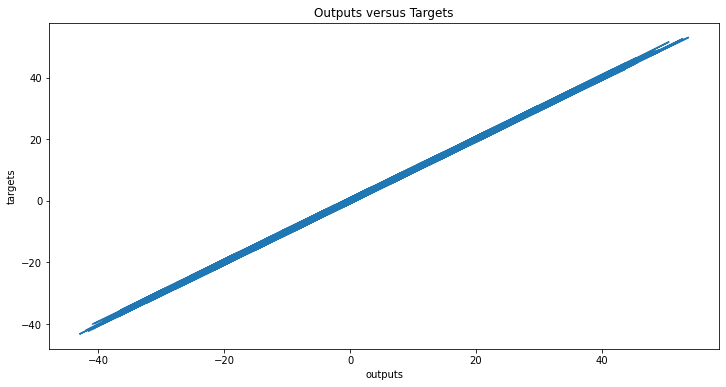

In [27]:
plt.figure(figsize=(12,6))
plt.plot(outputs,targets)
plt.xlabel('outputs')
plt.ylabel('targets')
plt.title("Outputs versus Targets");

Practice with more time:


Using the same code as before, please solve the following exercises:

    1. Change the number of observations to 100,000 and see what happens.

    2. Change the number of observations to 1,000,000 and see what happens.

    3. Play around with the learning rate. Values like:

    a) 0.0001 

    b) 0.001

    c) 0.1

    d) 1 


    4. Change the loss function. L2-norm loss (without dividing by 2) is a good way to start.

    5. Тry with the L1-norm loss, given by the sum of the ABSOLUTE value of yj - tj. You can check the exact formula in the respective notebook.

    6. Create a function f(x,z) = 13*xs + 7*zs - 12. Does the algorithm work in the same way?